In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import mean_squared_error
pd.set_option('display.max_columns', None)

In [200]:
data = pd.read_csv('Car_price.csv',encoding="utf-8")

In [201]:
data

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [170]:
data.describe(include = 'all')

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [171]:
data.dtypes

ID                    int64
symboling             int64
name                 object
fueltypes            object
aspiration           object
doornumbers          object
carbody              object
drivewheels          object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [172]:
data.duplicated().sum()

0

In [173]:
data.isnull().sum()

ID                  0
symboling           0
name                0
fueltypes           0
aspiration          0
doornumbers         0
carbody             0
drivewheels         0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [174]:
data['doornumbers'] = data['doornumbers'].map({'two' : 2, 'four' : 4})

In [175]:
data['cylindernumber'] = data['cylindernumber'].map({'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8})

In [176]:
data['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [177]:
data.dtypes

ID                    int64
symboling             int64
name                 object
fueltypes            object
aspiration           object
doornumbers           int64
carbody              object
drivewheels          object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber        int64
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [178]:
data.corr()['price']

ID                 -0.109093
symboling          -0.079978
doornumbers         0.031835
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
cylindernumber      0.718305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

In [179]:
data = data[['carlength','carwidth','curbweight','cylindernumber','enginesize','horsepower','citympg','highwaympg','price']]

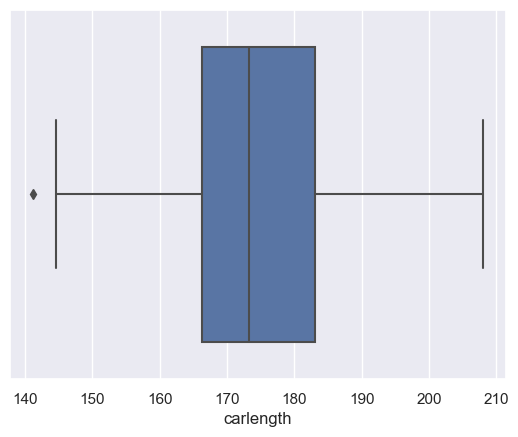

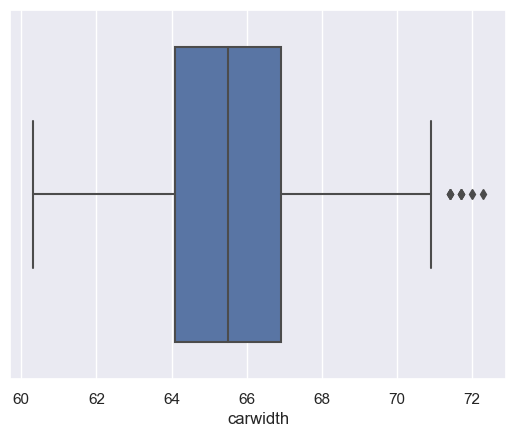

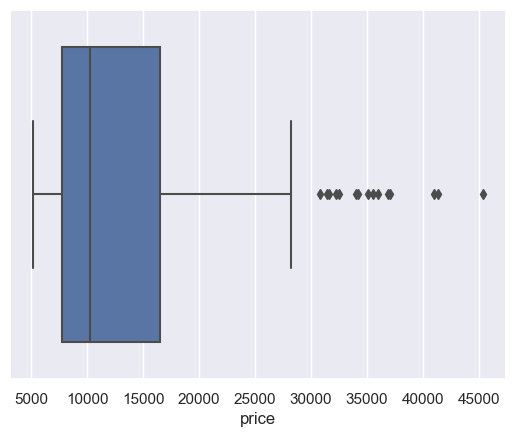

In [180]:
for i in data.columns:
    if data[i].dtype == int or data[i].dtype == float:
        sns.boxplot(x = data[i], data = data)
        plt.show()

In [181]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

Upper = Q3 + 1.5 * IQR
Lower = Q1 - 1.5 * IQR

C:\Users\user\AppData\Local\Temp\ipykernel_14736\1590598016.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where(data[i] > Upper[i], Upper[i], data[i])
C:\Users\user\AppData\Local\Temp\ipykernel_14736\1590598016.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where(data[i] < Lower[i], Lower[i], data[i])


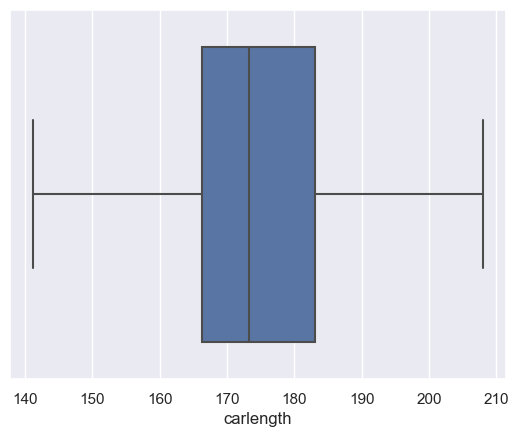

C:\Users\user\AppData\Local\Temp\ipykernel_14736\1590598016.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where(data[i] > Upper[i], Upper[i], data[i])
C:\Users\user\AppData\Local\Temp\ipykernel_14736\1590598016.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where(data[i] < Lower[i], Lower[i], data[i])


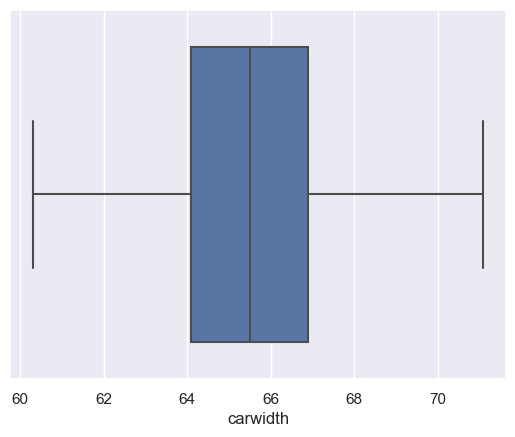

C:\Users\user\AppData\Local\Temp\ipykernel_14736\1590598016.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where(data[i] > Upper[i], Upper[i], data[i])
C:\Users\user\AppData\Local\Temp\ipykernel_14736\1590598016.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where(data[i] < Lower[i], Lower[i], data[i])


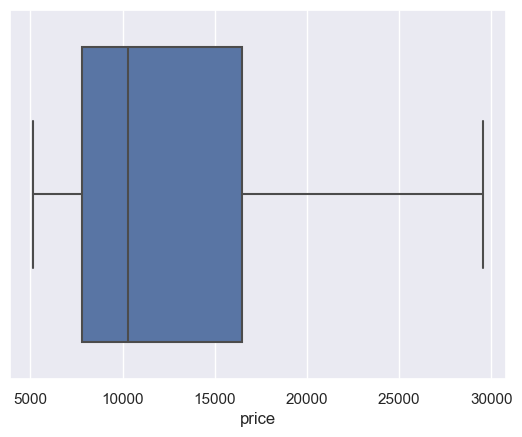

In [182]:
for i in data.columns:
    if data[i].dtype == int or data[i].dtype == float:
        data[i] = np.where(data[i] > Upper[i], Upper[i], data[i])
        data[i] = np.where(data[i] < Lower[i], Lower[i], data[i])
        sns.boxplot(x = data[i], data = data)
        plt.show()

In [183]:
from sklearn.preprocessing import LabelEncoder

for i in data.columns:
    if data[i].dtype == 'object':
        data [i] = LabelEncoder().fit_transform(data[i]) 

In [184]:
data.dtypes

carlength         float64
carwidth          float64
curbweight          int64
cylindernumber      int64
enginesize          int64
horsepower          int64
citympg             int64
highwaympg          int64
price             float64
dtype: object

In [185]:
data

,carlength,carwidth,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
0,168.8,64.1,2548,4,130,111,21,27,13495.0
1,168.8,64.1,2548,4,130,111,21,27,16500.0
2,171.2,65.5,2823,6,152,154,19,26,16500.0
3,176.6,66.2,2337,4,109,102,24,30,13950.0
4,176.6,66.4,2824,5,136,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...
200,188.8,68.9,2952,4,141,114,23,28,16845.0
201,188.8,68.8,3049,4,141,160,19,25,19045.0
202,188.8,68.9,3012,6,173,134,18,23,21485.0
203,188.8,68.9,3217,6,145,106,26,27,22470.0


<AxesSubplot:>

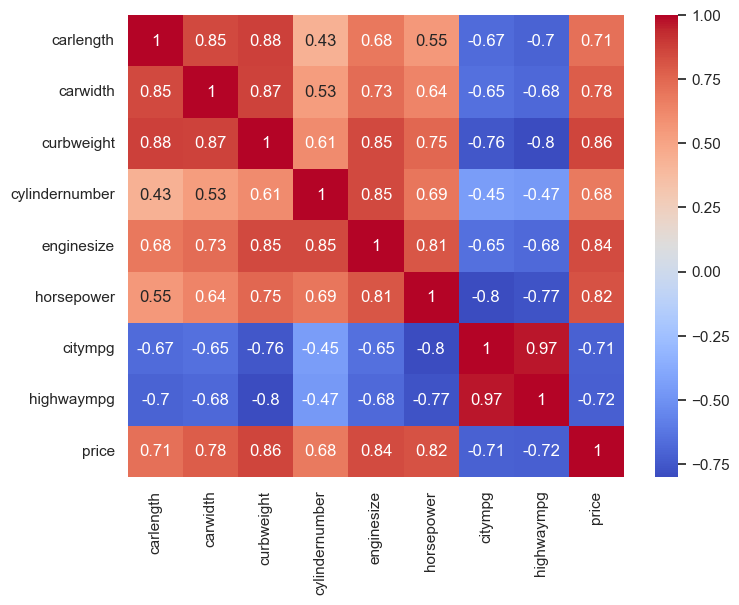

In [186]:
plt.figure(figsize = (8, 6))

sns.heatmap(data.corr(), cmap = 'coolwarm', annot = True)

In [187]:
inputs = data.drop('price', axis = 1)
target = data['price']

In [188]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.2, random_state = 42)

In [189]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [190]:
y_pred = reg.predict(X_test)

In [191]:
mae_test = metrics.mean_absolute_error(y_test, y_pred)
mse_test = metrics.mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
r2_test = metrics.r2_score(y_test, y_pred)

print('MAE test: {}'.format(mae_test))
print('MSE test: {}'.format(mse_test))
print('RMSE test: {}'.format(rmse_test))
print('R2 test: {}'.format(r2_test))

MAE test: 2349.345905469607
MSE test: 9190213.36504122
RMSE test: 3031.536469356953
R2 test: 0.8264746108163288


In [192]:
y_pred_train = reg.predict(X_train)

In [193]:
mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
mse_train = metrics.mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = metrics.r2_score(y_train, y_pred_train)

print('MAE : {}'.format(mae_train))
print('MSE : {}'.format(mse_train))
print('RMSE : {}'.format(rmse_train))
print('R2 : {}'.format(r2_train))

MAE : 1948.8325482762455
MSE : 7428821.524149665
RMSE : 2725.586455086256
R2 : 0.8267312207915785


In [194]:
data.head()

,carlength,carwidth,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
0,168.8,64.1,2548,4,130,111,21,27,13495.0
1,168.8,64.1,2548,4,130,111,21,27,16500.0
2,171.2,65.5,2823,6,152,154,19,26,16500.0
3,176.6,66.2,2337,4,109,102,24,30,13950.0
4,176.6,66.4,2824,5,136,115,18,22,17450.0


In [195]:
data.columns

Index(['carlength', 'carwidth', 'curbweight', 'cylindernumber', 'enginesize',
       'horsepower', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [196]:
new_data = pd.DataFrame({
        'carlength' : [168.8,168.8,171.2,176.6,176.6],
        'carwidth' : [64.1,64.1,65.5,66.2,66.4],
        'curbweight' : [2548,2548,2823,2337,2824],
        'cylindernumber' : [4,4,6,4,5],
        'enginesize' : [130,160,152,109,136],
        'horsepower' : [111,111,154,102,115],
        'citympg' : [21,21,19,24,18],
        'highwaympg' : [27,27,26,30,22]
        })

new_data

,carlength,carwidth,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg
0,168.8,64.1,2548,4,130,111,21,27
1,168.8,64.1,2548,4,160,111,21,27
2,171.2,65.5,2823,6,152,154,19,26
3,176.6,66.2,2337,4,109,102,24,30
4,176.6,66.4,2824,5,136,115,18,22


In [197]:
new_prediction = reg.predict(new_data)

In [198]:
new_data['price'] = new_prediction

new_data

,carlength,carwidth,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
0,168.8,64.1,2548,4,130,111,21,27,12432.399357
1,168.8,64.1,2548,4,160,111,21,27,13089.436232
2,171.2,65.5,2823,6,152,154,19,26,17826.374720
3,176.6,66.2,2337,4,109,102,24,30,11416.387736
4,176.6,66.4,2824,5,136,115,18,22,15169.308528
